In [1]:
from CoolProp.CoolProp import PropsSI 
import numpy as np
import matplotlib.pyplot as plt 

T0=300                   #environment temperature
m_a=1                   #mass flow rate of air


In [4]:
# Air Compressor

n_c=0.84                      #isentropic efficiency                        
Pin_c=100000                  # Inlet pressure
Tin_c=300                     #inlet temperature
Pout_c=1200000                #outlet pressure
Q_c=0                         #heat gain in compressor
Fi_c=0                        # Exergy input by heat in compressor

hin_c=PropsSI('H','P',Pin_c,'T',Tin_c,'Air')
sin_c=PropsSI('S','P',Pin_c,'T',Tin_c,'Air')
sout_cs=sin_c
Pout_cs=Pout_c
hout_cs=PropsSI('H','P',Pout_cs,'S',sout_cs,'Air')
hout_c=hin_c+(hout_cs-hin_c)/n_c
sout_c=PropsSI('S','P',Pout_c,'H',hout_c,'Air')
###########################################################
#1st law
W_c=Q_c+m_a*(hin_c-hout_c)

#2nd law
I_c=Fi_c-W_c+m_a*(hin_c-hout_c-T0*(sin_c-sout_c))
n_2_c= (W_c+I_c)/W_c

#printig value:
print('compressor input',W_c,'\n')
print('irreversibility',I_c,'\n')
print('Exergy efficiency',n_2_c)

compressor input -370361.9987783382 

irreversibility 28153.0650389996 

Exergy efficiency 0.9239850062051068


In [6]:
#Combustor

hin_com=hout_c
Pin_com=Pout_c
Tout_com=1400
Pout_com=Pin_com
W_com=0
I_com=0

hin_com=PropsSI('H','P',Pin_com,'H',hin_com,'Air')
sin_com=PropsSI('S','P',Pin_com,'H',hin_com,'Air')

hout_com=PropsSI('H','P',Pout_c,'T',Tout_com,'Air')
sout_com=PropsSI('S','P',Pout_c,'T',Tout_com,'Air')

########################################
#1st law
Q_com=W_com-m_a*(hin_com-hout_com)

#2nd law

Fi_com=W_com-m_a*(hin_com-hout_com-T0*(sin_com-sout_com))
n_2_com=(Fi_com-I_com)/Fi_com

#printing value
print('heat input',Q_com)
print('Exergy input',Fi_com)
print("Exergy efficiency",n_2_com)



heat input 846037.5661962205
Exergy input 589974.4347588865
Exergy efficiency 1.0


In [7]:
# Air Turbine
n_t_a=0.88                      #efficiency                         
Pin_t_a=Pout_com                  # Inlet pressure
Tin_t_a=Tout_com                     #inlet temperature
Pout_t_a=100000                #outlet pressure
Q_t_a=0                         #heat gain in turbine
Fi_t_a=0                        # Exergy input by heat in turbine

hin_t_a=PropsSI('H','P',Pin_t_a,'T',Tin_t_a,'Air')
sin_t_a=PropsSI('S','P',Pin_t_a,'T',Tin_t_a,'Air')
sout_ts_a=sin_t_a
Pout_ts_a=Pout_t_a
hout_ts_a=PropsSI('H','P',Pout_ts_a,'S',sout_ts_a,'Air')
hout_t_a=hin_t_a+(hout_ts_a-hin_t_a)*n_t_a
sout_t_a=PropsSI('S','P',Pout_t_a,'H',hout_t_a,'Air')

######################################################################
#1st law
W_t_a=Q_t_a+m_a*(hin_t_a-hout_t_a)

#2nd law
I_t_a=Fi_t_a-W_t_a+m_a*(hin_t_a-hout_t_a-T0*(sin_t_a-sout_t_a))
n_2_t_a= W_t_a/(W_t_a+I_t_a)

#printig value:
print('turbine outputput',W_t_a)
print('irreversibility',I_t_a)
print('Exergy efficiency',n_2_t_a)


turbine outputput 658286.9448573011
irreversibility 34038.984400560264
Exergy efficiency 0.9508338732350406


In [8]:
#Pump and HRSG
#Pump


n_p=0.80                      #efficiency                         
Pin_p=8000                  # Inlet pressure
Qin_p=0                     #saturated water
Pout_p=8000000
Q_p=0                         #heat gain in compressor
Fi_p=0                        # Exergy input by heat in compressor

hin_p=PropsSI('H','P',Pin_p,'Q',Qin_p,'Water')
sin_p=PropsSI('S','P',Pin_p,'Q',Qin_p,'Water')
sout_ps=sin_p
Pout_ps=Pout_p
hout_ps=PropsSI('H','P',Pout_ps,'S',sout_ps,'Water')
hout_p=hin_p+(hout_ps-hin_p)/n_p
sout_p=PropsSI('S','P',Pout_p,'H',hout_p,'Water')

#HRSG
Q_hrsg=0
W_hrsg=0
Fi_hrsg=0
Tout_hrsg_air=400
Pout_hrsg_air=Pout_t_a

Tout_hrsg_water=400+273
Pout_hrsg_water=Pout_p

hin_hrsg_air=hout_t_a
sin_hrsg_air=sout_t_a
hout_hrsg_air=PropsSI('H','P',Pout_hrsg_air,'T',Tout_hrsg_air,'Air')
sout_hrsg_air=PropsSI('S','P',Pout_hrsg_air,'T',Tout_hrsg_air,'Air')

hin_hrsg_water=hout_p
sin_hrsg_water=sout_p
hout_hrsg_water=PropsSI('H','P',Pout_hrsg_water,'T',Tout_hrsg_water,'Water')
sout_hrsg_water=PropsSI('S','P',Pout_hrsg_water,'T',Tout_hrsg_water,'Water')
#####################################################################################
#1st law
m_w=m_a*(hin_hrsg_air-hout_hrsg_air)/(hout_hrsg_water-hin_hrsg_water)
print("mass flow rate of water",m_w)

#2nd law
I_hrsg=Fi_hrsg-W_hrsg+m_a*(hin_hrsg_air-hout_hrsg_air-T0*(sin_hrsg_air-sout_hrsg_air))+m_w*(hin_hrsg_water-hout_hrsg_water-T0*(sin_hrsg_water-sout_hrsg_water))
flow_exergy_hrsg=m_a*(hin_hrsg_air-hout_hrsg_air-T0*(sin_hrsg_air-sout_hrsg_air))
n_2_hrsg=(flow_exergy_hrsg-I_hrsg)/flow_exergy_hrsg
print('Irreversibility in HRSG',I_hrsg)
print('Exergy efficiency of hrsg',n_2_hrsg)

#pump
#1st law
W_p=Q_p+m_w*(hin_p-hout_p)
print('pump work input', W_p)
#2nd law
I_p=Fi_p-W_p+m_w*(hin_p-hout_p-T0*(sin_p-sout_p))
n_2_p=(W_p+I_p)/W_p
print('irreversibility of pump',I_p)
print('Exergy efficiency of pump',n_2_p)





mass flow rate of water 0.15470405199984053
Irreversibility in HRSG 36478.14657086009
Exergy efficiency of hrsg 0.8386032865304848
pump work input -1555.9450282783123
irreversibility of pump 296.2364333429248
Exergy efficiency of pump 0.8096099618180489


In [10]:
# Water Turbine
n_t_w=0.90                      #efficiency                         
Pin_t_w=Pout_hrsg_water                  # Inlet pressure
Tin_t_w=Tout_hrsg_water                     #inlet temperature
Pout_t_w=Pin_p                #outlet pressure
Q_t_w=0                         #heat gain in turbine
Fi_t_w=0                        # Exergy input by heat in turbine

hin_t_w=PropsSI('H','P',Pin_t_w,'T',Tin_t_w,'Water')
sin_t_w=PropsSI('S','P',Pin_t_w,'T',Tin_t_w,'Water')
sout_ts_w=sin_t_w
Pout_ts_w=Pout_t_w
hout_ts_w=PropsSI('H','P',Pout_ts_w,'S',sout_ts_w,'Water')
hout_t_w=hin_t_w+(hout_ts_w-hin_t_w)*n_t_w
sout_t_w=PropsSI('S','P',Pout_t_w,'H',hout_t_w,'Water')

######################################################################
#1st law
W_t_w=Q_t_w+m_w*(hin_t_w-hout_t_w)

#2nd law
I_t_w=Fi_t_w-W_t_w+m_w*(hin_t_w-hout_t_w-T0*(sin_t_w-sout_t_w))
n_2_t_w=W_t_w/(W_t_w+I_t_w)
#printig value:
print('turbine outputput',W_t_w)
print('irreversibility',I_t_w)
print('Exergy efficiency',n_2_t_w)


turbine outputput 159935.29122534447
irreversibility 16942.72322606985
Exergy efficiency 0.9042123845712676


In [14]:
#Condenser

hin_con=hout_t_w
Pin_con=Pout_t_w
Qout_con=0
Pout_con=Pin_p
W_con=0
I_con=0

hin_con=PropsSI('H','P',Pin_con,'H',hin_con,'Water')
sin_con=PropsSI('S','P',Pin_con,'H',hin_con,'Water')

hout_con=PropsSI('H','P',Pout_con,'Q',Qout_con,'Water')
sout_con=PropsSI('S','P',Pout_con,'Q',Qout_con,'Water')

########################################
#1st law
Q_con=W_con-m_w*(hin_con-hout_con)

#2nd law

Fi_con=W_con-m_w*(hin_con-hout_con-T0*(sin_con-sout_con))
flow_exergy_con=m_w*(hin_con-hout_con-T0*(sin_con-sout_con))
n_2_con=(flow_exergy_con-I_con)/flow_exergy_con

#printing value
print('heat output',Q_con)
print('Exergy output',Fi_con)
print('Exergy efficiency',n_2_con)

heat output -298778.6596625886
Exergy output -13918.97122470541
Exergy efficiency 1.0


In [21]:
#energy balance of the cycle
Q_net=Q_com+Q_con
W_net=W_t_a+W_t_w+W_c+W_p
Q_net-W_net+m_a*(hin_c-hout_hrsg_air)

-5.820766091346741e-11

In [22]:
#Exergy balance of the cycle
Fi_net=Fi_com+Fi_con
I_total=I_c+I_com+I_t_a+I_p+I_hrsg+I_t_w+I_con
Fi_net-W_net+m_a*((hin_c-hout_hrsg_air)-T0*(sin_c-sout_hrsg_air))-I_total

-8.731149137020111e-11

In [23]:
#overall efficiency
n_1=W_net/Q_com
n_2=W_net/Fi_com
print('Thermal/1st law efficiency',n_1)
print('Exergy/2nd law efficiency',n_2)

Thermal/1st law efficiency 0.527523020381483
Exergy/2nd law efficiency 0.7564807320141369


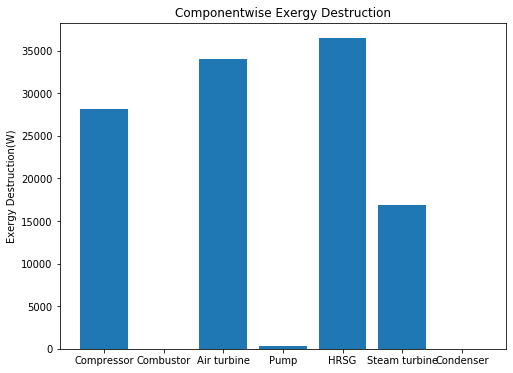

In [37]:
#Componentwise exergy destruction
objects = ('Compressor', 'Combustor', 'Air turbine', 'Pump', 'HRSG', 'Steam turbine','Condenser')
y_pos = np.arange(len(objects))
performance = [I_c,I_com,I_t_a,I_p,I_hrsg,I_t_w,I_con]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Exergy Destruction(W)')
plt.title('Componentwise Exergy Destruction')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

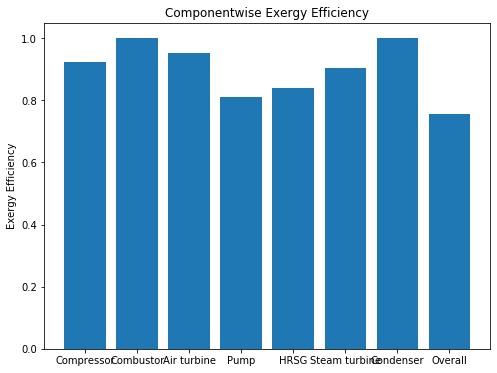

In [35]:
# Componentwise exergy efficiency
objects = ('Compressor', 'Combustor', 'Air turbine', 'Pump', 'HRSG', 'Steam turbine','Condenser','Overall')
y_pos = np.arange(len(objects))
performance = [n_2_c,n_2_com,n_2_t_a,n_2_p,n_2_hrsg,n_2_t_w,n_2_con,n_2]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Exergy Efficiency')
plt.title('Componentwise Exergy Efficiency')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

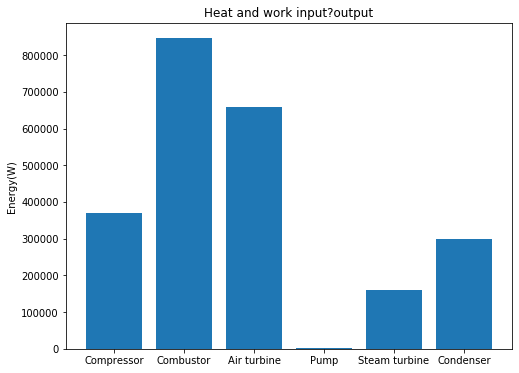

In [40]:
# Heat and work input output
objects = ('Compressor', 'Combustor', 'Air turbine', 'Pump', 'Steam turbine','Condenser')
y_pos = np.arange(len(objects))
performance = [-W_c,Q_com,W_t_a,-W_p,W_t_w,-Q_con]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Energy(W)')
plt.title('Heat and work input?output')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()